# DS2 - Analysis

## Contents

- [Imports](#Imports)
- [Describe the Data](#Describe-the-Data)
- [Visualizations](#Visualizations)
- [KMeans Clustering](#KMeans-Clustering)
- [Evaluation](#Evaluation)
 - [Visualizing 4 Clusters](#Visualizing-KMeans-with-4-Clusters)

### Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


### Decribe the Data

In [2]:
#read in file
df = pd.read_csv('./ds2.csv', index_col = 0)

In [3]:
#first look
df.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  
1  -6.110282 -28.959316   2.851336  
2   7.070349  -5.762185 -23.050198  
3  19.119391 -15.582122 -12.292535  
4   0.493711 -15.305347   6.799087  
5 -10.848273 -17.285491   6.034214

In [4]:
#Dimensions of data set
df.shape

(2000, 10)

In [5]:
#checking for null values
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
dtype: int64

There are no missing values in this data set.

In [6]:
df.describe().T

count       mean        std        min        25%        50%        75%  \
X1   2000.0   8.677829  11.971827 -25.824199   0.231327  12.754335  17.364337   
X2   2000.0  11.716801   6.655333  -8.497562   7.161564  11.896021  16.279210   
X3   2000.0   9.252817   9.861443 -23.666439   2.648845  11.422441  16.503676   
X4   2000.0  -2.679634  10.625164 -29.429655 -10.652694  -2.631318   5.340314   
X5   2000.0   2.774942   8.800553 -22.033329  -4.098043   2.484416   9.660898   
X6   2000.0   0.077631  15.375478 -35.264019 -14.003670   1.500838  14.050512   
X7   2000.0   8.200884  10.426023 -21.428538  -0.812888   8.532535  17.138898   
X8   2000.0   8.712878   9.881482 -16.811146   1.480706   9.628064  16.081044   
X9   2000.0 -12.860135   8.881026 -36.065150 -19.430697 -14.417786  -6.534142   
X10  2000.0  -1.339360  14.534143 -36.468083 -13.216190  -2.094310  10.561797   

           max  
X1   32.268570  
X2   32.909917  
X3   31.230550  
X4   26.422798  
X5   29.312010  
X6   31.727042  
X7   32.084297  
X8   36.847922  
X9   13.553705  
X10  32.641789

The chart above provides descriptive statistics on all the features in the data set. The data is a combination of positive and negative numbers ranging from approximately -36 to 36. Each feature has a minimum value that is negative. `X9` is the only feature that doesn't have a maximum value of at least 20. We can see that the majoirty of the features are spread out around the mean due to the high standard deviation scores. We will get a better understanding of the distributions of each feature and target variable by looking at them graphically.

### Visualizations

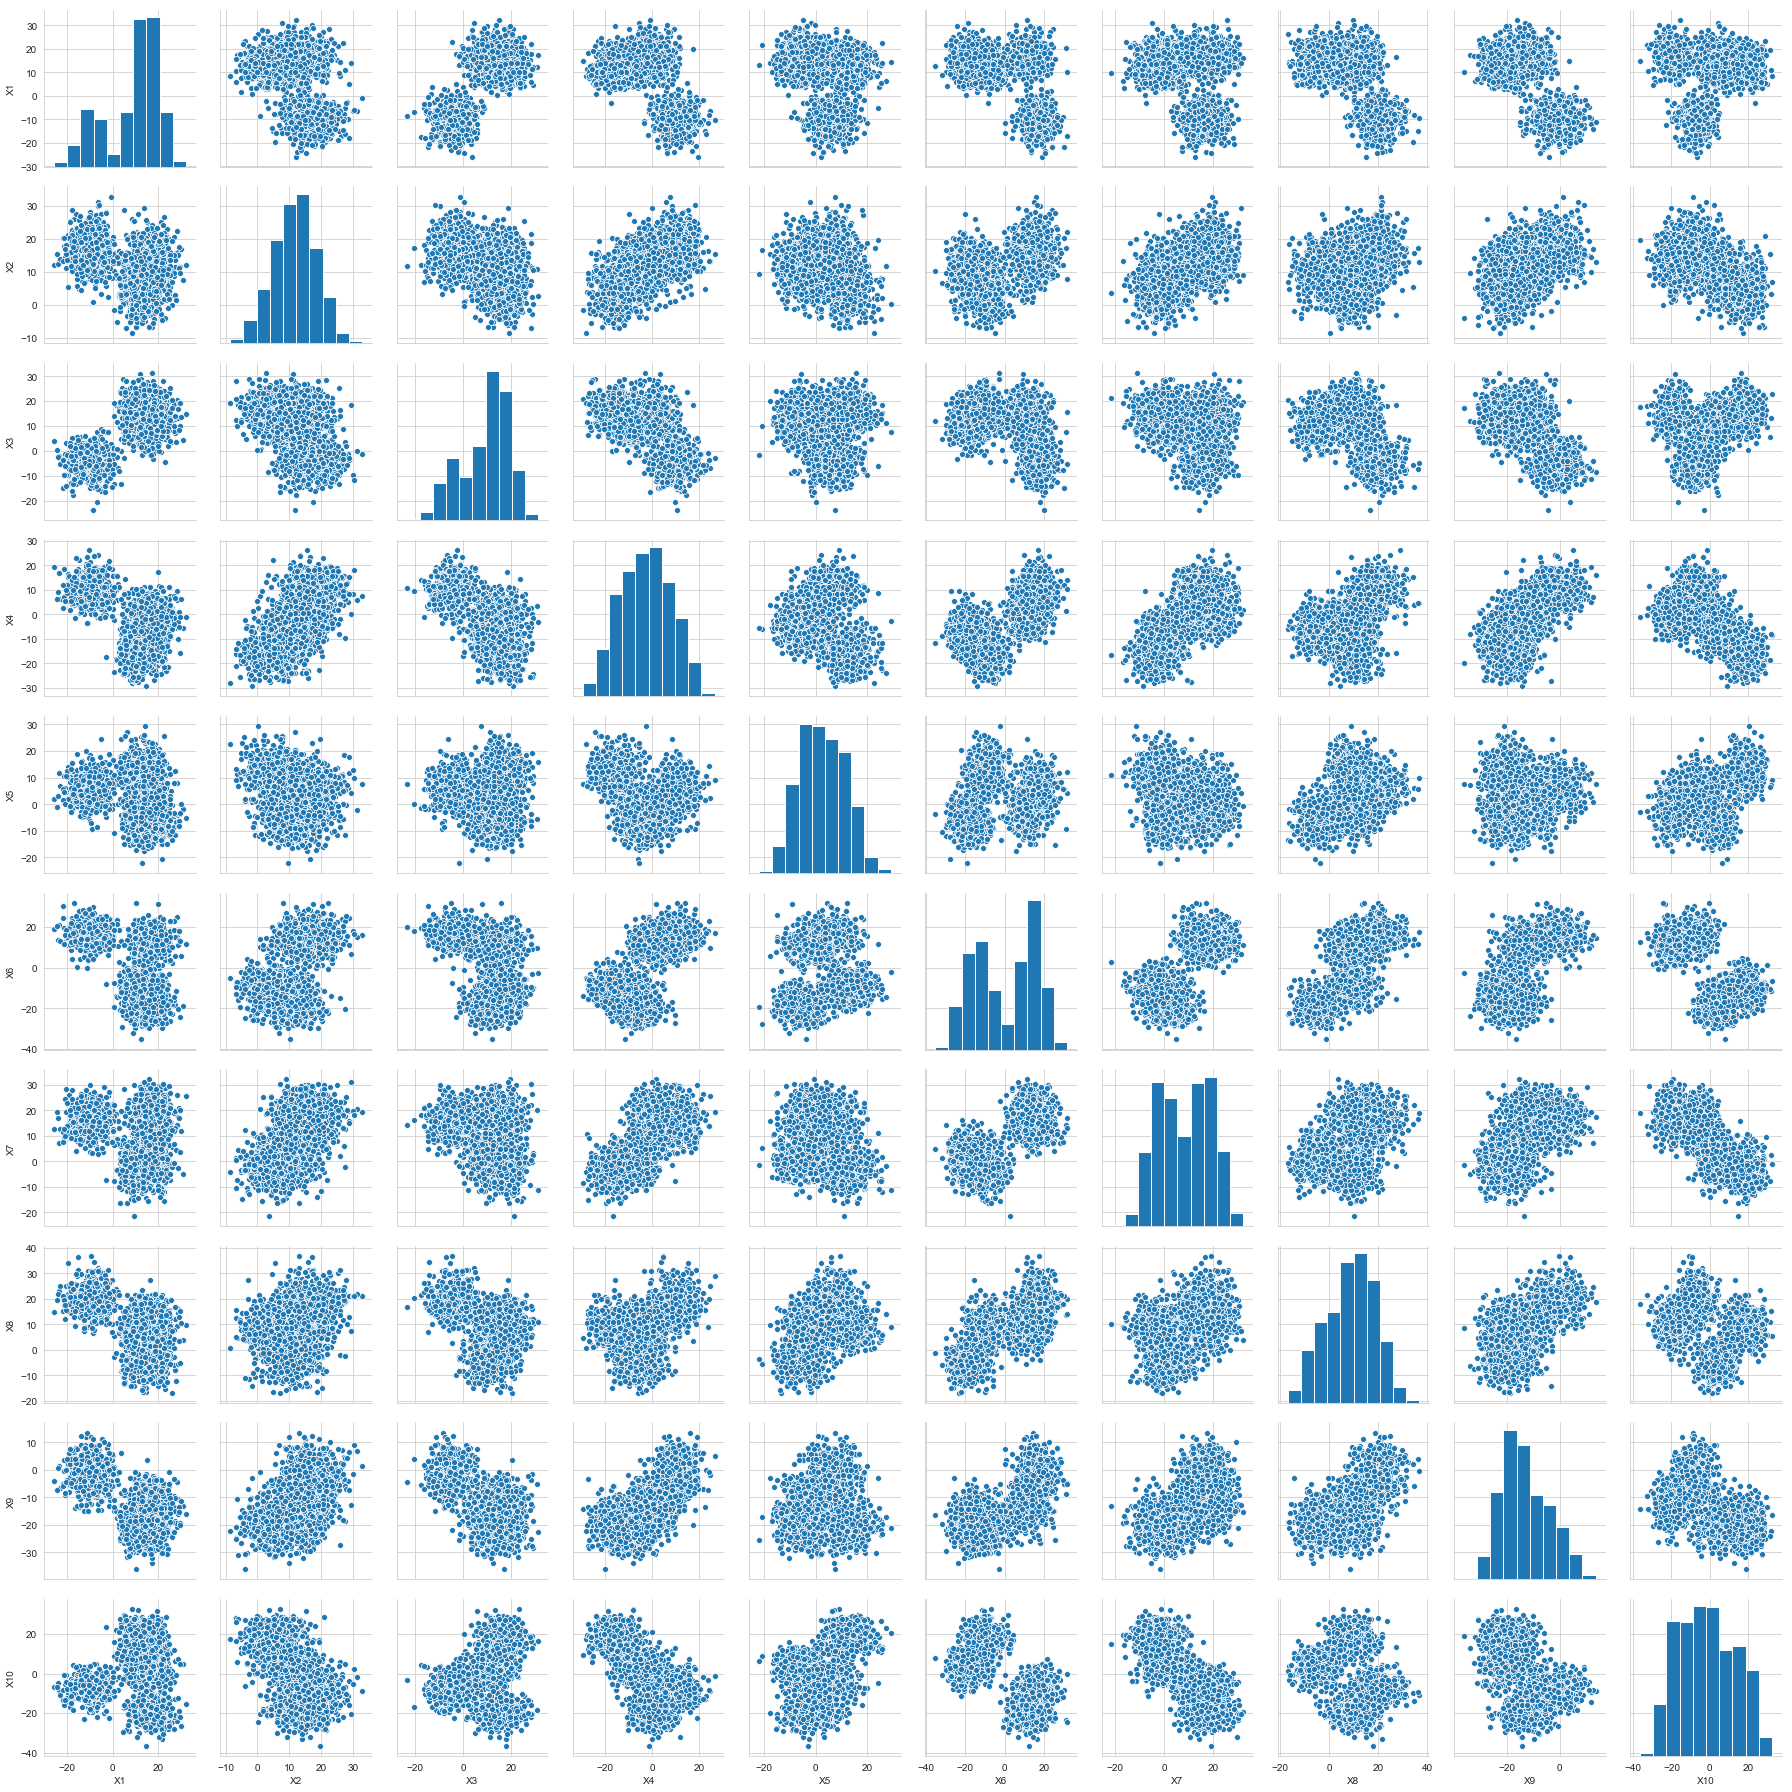

In [7]:
sns.pairplot(df)

A pairplot is a useful way of looking initially at a data set to see the relationship of features when knowing very little about where the data came from. Please keep in mind that it is best used when there not many features, otherwise the graph can become very difficult to read. The pairplot shows a scatter plot of each feature versus all the other features in the data set. The histograms show the distribution for that specific feature. From the pairplot above, we can see a pattern in many of the graphs. It looks as though the data is separated into distinct clusters. This could mean many different things, but one possibility is that the data set came from multiple files and was joined together. Another possibility is that each cluster can signify a specific type of group (e.g. political party). We can learn more about the data through unsupervised learning techniques.

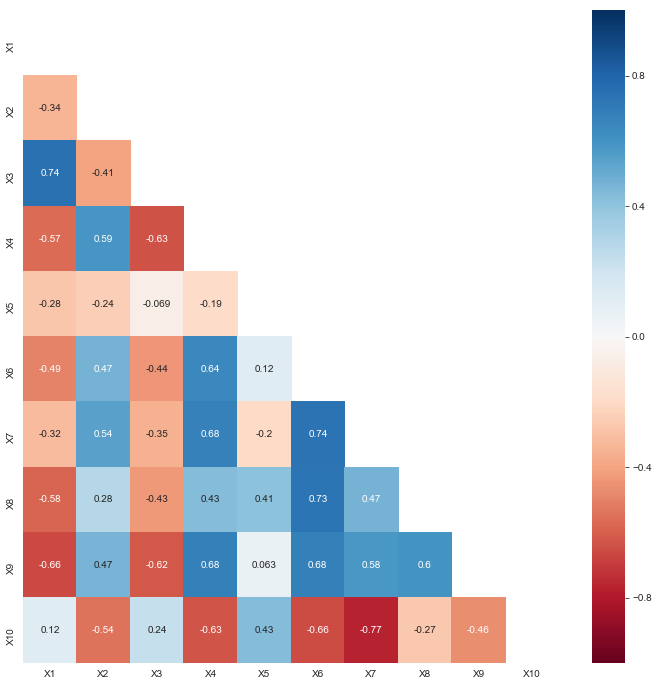

In [8]:
# Graphing Heat map
plt.figure(figsize=(12,12))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(),cmap="RdBu", annot=True, mask = mask, vmin = -1);

Another way to learn more about the features is by looking at a correlation heat map. We can see thet `X6, X7, X8 and X9` are highly correlated with each other. `X1 and X3` are mainly correlated with each other. Knowing what each feature represented would make it easier to interpret the correlations to see if they align with our assumptions.

In [9]:
#Created a function below to create histograms for many features.
def make_histograms(df,list_of_columns):
    fig   = plt.figure(figsize = (20, 40))      # Set the size for each plot
    count = 0                                   # The count sets the location for each subplot
    for column in list_of_columns:
        count += 1                              # By adding 1 to the count I can create a new location for the graph
        ax = fig.add_subplot(16, 3, count)
        df.hist(column = column, ax = ax, figsize = (10,12))
        plt.title(column, size = 18); 
    plt.tight_layout();

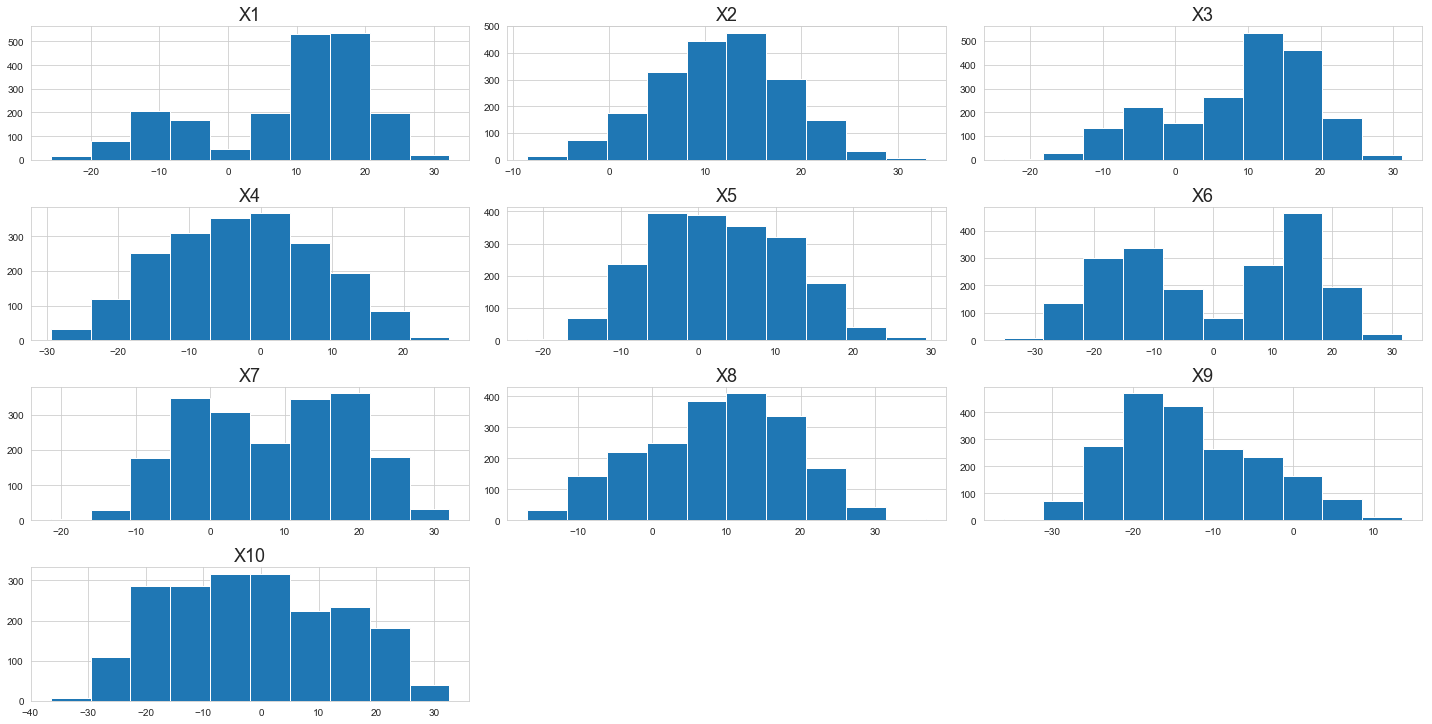

In [10]:
make_histograms(df, df.columns)

Histograms allow us to see the distribution of each feature.

- `X1`: Has 2 modes which could be caused from merging multiple data sets. Right side of graph looks normally distributed.
- `X2`: Normal Distribution
- `X3`: Skewed to the left. Similar distribution to `X1`.
- `X4`: Normal Distribution
- `X5`: Normal Distribution
- `X6`: Has 2 modes.
- `X7`: Has 2 modes
- `X8`: Slightly skewed to the left. Close to a normal distribution.
- `X9`: Skewed to the right
- `X10`: Normal Distribution

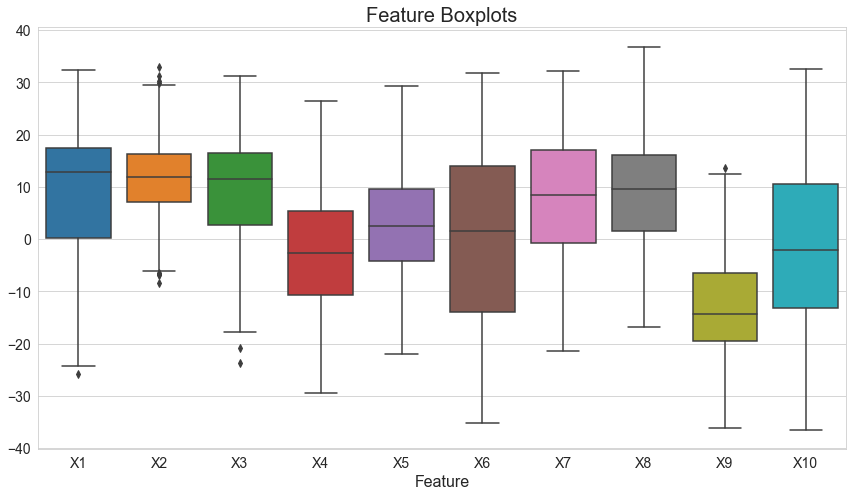

In [11]:
#Boxplot of Features
plt.figure(figsize = (12, 7))

plt.title("Feature Boxplots", size = 20)
sns.boxplot(data = df)


plt.xlabel('Feature', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.tight_layout();

The boxplots above are another way for us to look at the distribtion of the ten features. Some features have a wider range than others (e.g. `X6`), but as expected from the descriptive statistics chart above, the observations for each feature mainly fall between -30 and 30.

### KMeans Clustering

We are going to utilize the KMeans Clustering algorithm to test whether or not there are identifiable clusters in the data set as we presumed above. This could be caused by someone joining multiple files into one data set. Before running KMeans, we will need to scale the data it utlizes distance measurements in the algorithm.

In [12]:
# Scaling data
X = df
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [13]:
#Fiting a k-means clustering model
km = KMeans(n_clusters= 3, random_state= 42)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

We are testing the algorithm using 3 clusters to begin with since that is how many clusters were apparent in the pairplot above. We will test different numbers of clusters below.

In [14]:
# attaching predicted cluster to original points
df['cluster'] = km.labels_
df.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  cluster  
1  -6.110282 -28.959316   2.851336        0  
2   7.070349  -5.762185 -23.050198        2  
3  19.119391 -15.582122 -12.292535        2  
4   0.493711 -15.305347   6.799087        0  
5 -10.848273 -17.285491   6.034214        0

In [15]:
# Avg. Values by Cluster
df.groupby("cluster").mean()

X1         X2         X3         X4        X5         X6  \
cluster                                                                    
0        13.970348   7.861321  13.634118 -10.534899  3.477185 -13.993580   
1        -9.712850  16.744653  -4.848168  10.163147  6.201955  16.198990   
2        17.024321  14.365331  14.990692   0.006055 -2.236760  12.068201   

                X7         X8         X9        X10  
cluster                                              
0        -0.682310   2.310457 -19.118040  10.621519  
1        16.227576  19.646245  -1.272241  -7.630330  
2        18.013695  10.415960 -12.135521 -19.262561

There does not seem to be a particular trend when looking at the average values for each cluster.

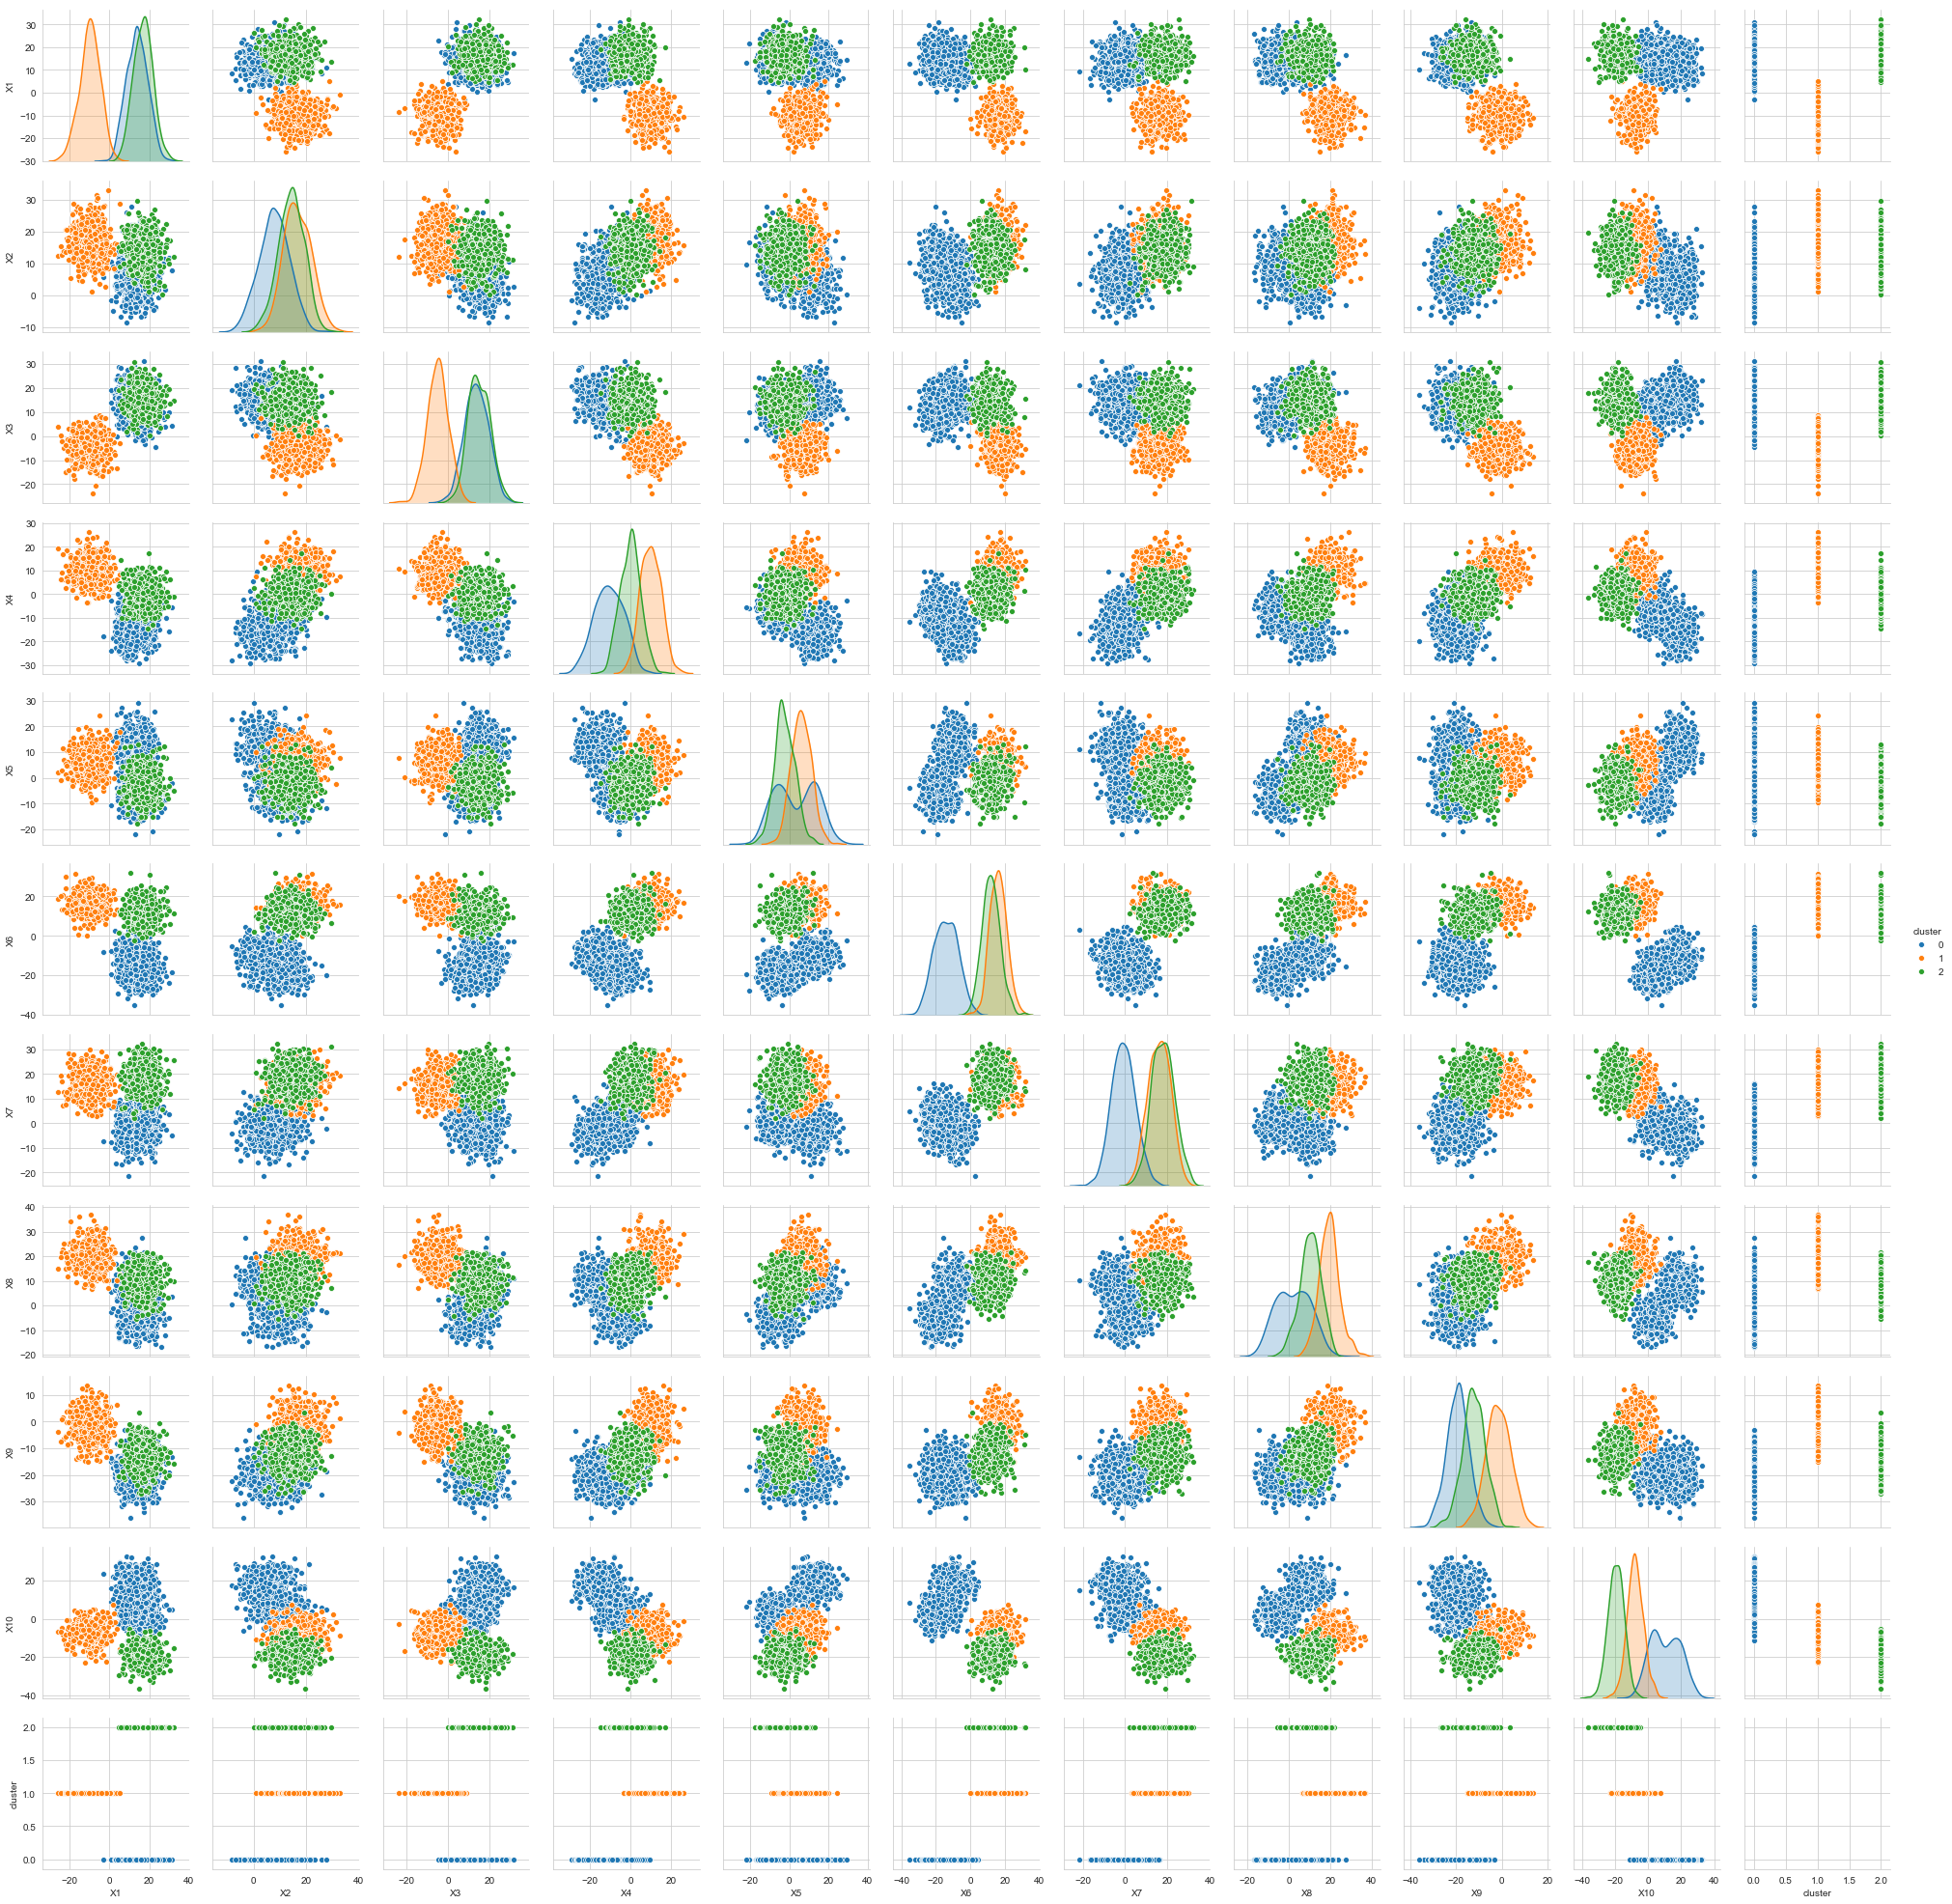

In [16]:
sns.pairplot(df, hue = 'cluster')

The pairplot above is able to visually show each observation and their respective cluster. The clusters looked to be tightly compacted and easily distinguishable. We will look at the silhoutte score and inertia to confirm what we are seeing visually above.

In [17]:
#checking Silhouette score for 3 clusters
silhouette_score(X_sc, km.labels_)

0.40873336511338376

The silhoutte score is a good way to evaluate the viability of the clusters. It measures how far apart points within a cluster are as well as how far apart clusters are from each other. A silhoutte score of .408 shows that there are distinct clusters within the data set. We will look to see below if the silhoutte score can increase with a different number of clusters.

In [18]:
km.inertia_

7577.550433709419

Inertia measures the density of the clusters. As we increase the number of clusters, the inertia will drop. We will look to find a balance between inertia and silhoutte score below.

### Evaluation

We will look to see if there are possibly more clusters than we were visually able to see above. A silhoutte score above .408 will be a determining factor.

In [19]:
#Loop testing KMeans with multiple cluster values
scores = []
for k in range(2, 20):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [20]:
score_df.head()

k       inertia  silhouette
0  2  11085.647084    0.398405
1  3   7577.550434    0.408733
2  4   5141.137491    0.436556
3  5   4934.902106    0.347319
4  6   4766.911003    0.268592

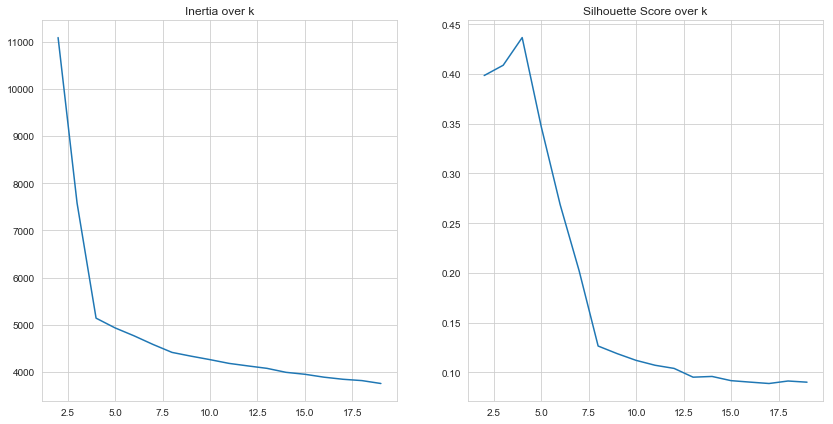

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df['k'], score_df['inertia'])
axes[0].set_title('Inertia over k')
axes[1].plot(score_df['k'], score_df['silhouette'])
axes[1].set_title('Silhouette Score over k');

After testing KMeans with many different cluster values, we can see that `4` clusters provides the highest silhoutte score (.436) with a lower inertia than when we tested 3 clusters. The graph to the right shows that when we increase the number of clusters to greater than 4, the silhoutte score significantly drops.

#### Visualizing KMeans with 4 Clusters

In [22]:
#Cereating new dataframe with cluster labels
df4 = df.copy()
df4.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  cluster  
1  -6.110282 -28.959316   2.851336        0  
2   7.070349  -5.762185 -23.050198        2  
3  19.119391 -15.582122 -12.292535        2  
4   0.493711 -15.305347   6.799087        0  
5 -10.848273 -17.285491   6.034214        0

In [23]:
#dropping previous cluster labels
df4.drop(columns = ['cluster'], inplace = True)

In [24]:
#Instantiating model with 4 clusters
km4 = KMeans(n_clusters= 4, random_state= 42)
km4.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
#Adding cluster labels to dataframe
df4['cluster'] = km4.labels_
df4.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  cluster  
1  -6.110282 -28.959316   2.851336        3  
2   7.070349  -5.762185 -23.050198        2  
3  19.119391 -15.582122 -12.292535        2  
4   0.493711 -15.305347   6.799087        3  
5 -10.848273 -17.285491   6.034214        3

In [26]:
df4.groupby('cluster').mean()

X1         X2         X3         X4         X5         X6  \
cluster                                                                     
0        12.775766   4.976265  16.369598 -15.674341  12.888714  -9.357903   
1        -9.712850  16.744653  -4.848168  10.163147   6.201955  16.198990   
2        17.024321  14.365331  14.990692   0.006055  -2.236760  12.068201   
3        15.120425  10.638894  11.000549  -5.586927  -5.583719 -18.456556   

                X7         X8         X9        X10  
cluster                                              
0        -3.074523   9.061394 -19.410610  18.075984  
1        16.227576  19.646245  -1.272241  -7.630330  
2        18.013695  10.415960 -12.135521 -19.262561  
3         1.620782  -4.188975 -18.836370   3.444770

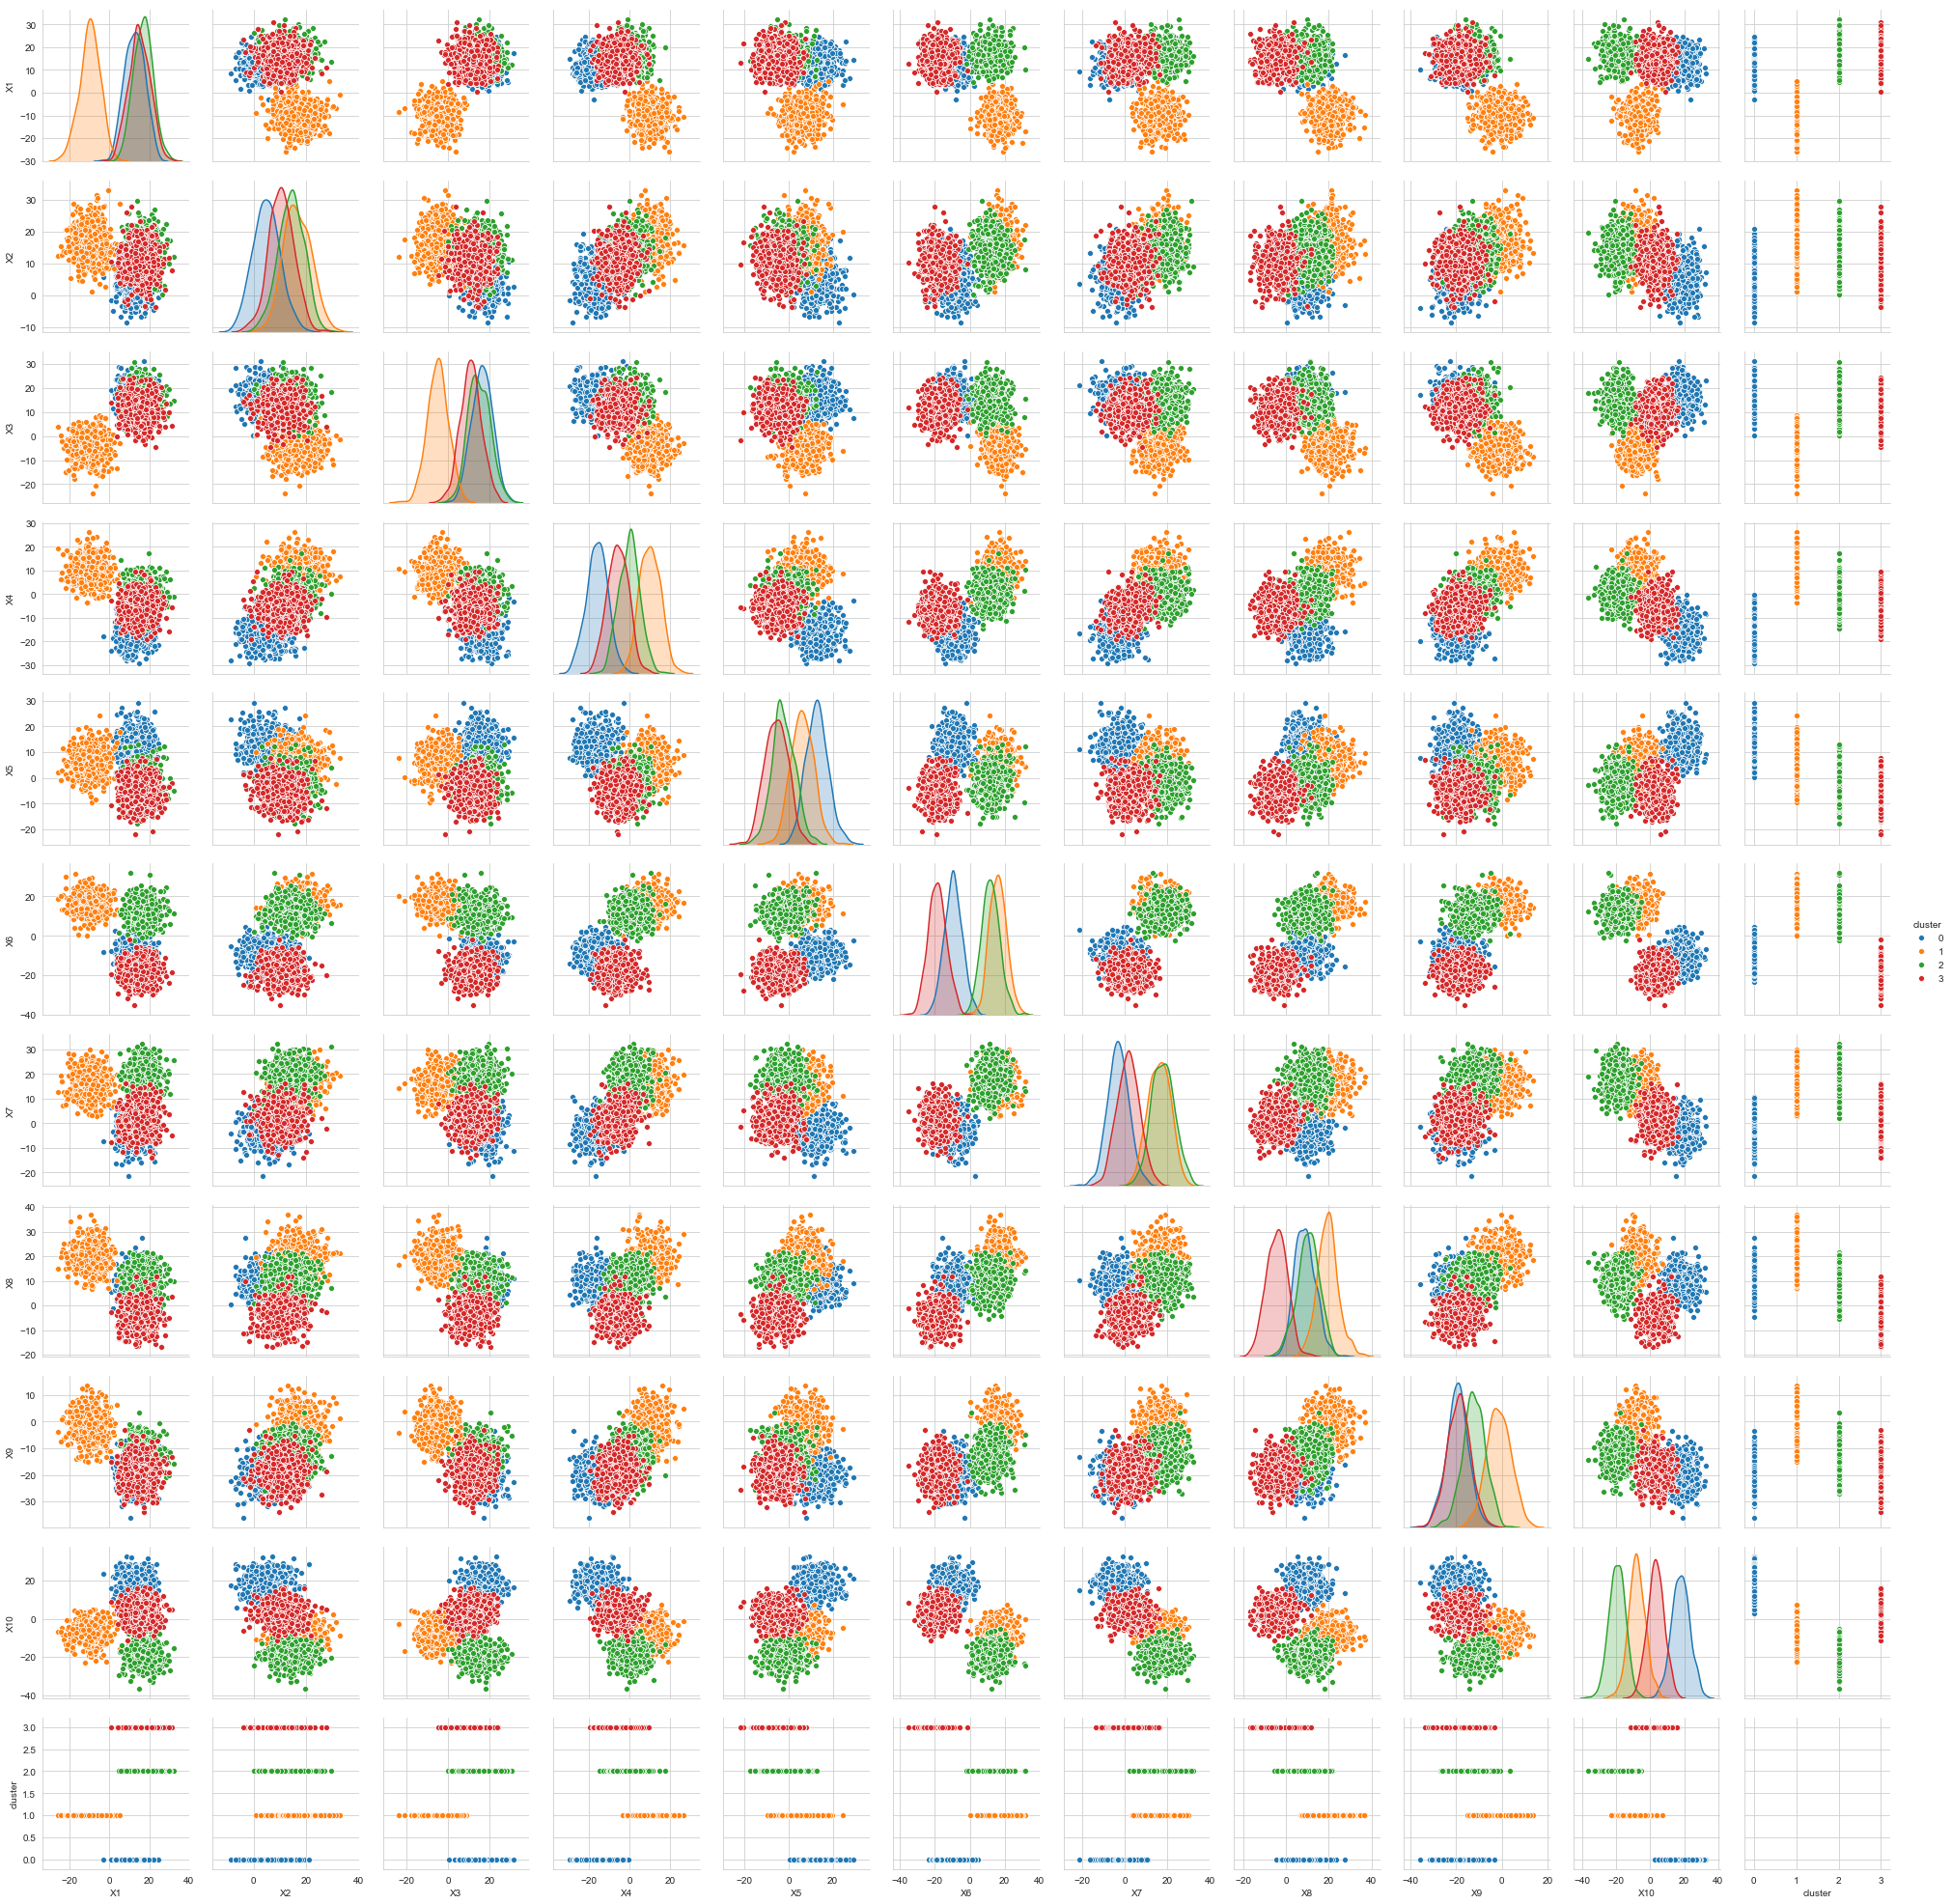

In [27]:
sns.pairplot(df4, hue = 'cluster')

The pairplot above confirms our analysis that there are 4 distinct clusters within the data set. Each color is associated with a different cluster. The different clusters could be caused by someone combining 4 different data sets into one file. 